In [1]:
# Imports
import numpy as np
from scipy.special import erf
from scipy.optimize import curve_fit, least_squares
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.interpolate import interp1d
from astropy.table import Table
import matplotlib.colors as colors
from scipy.special import wofz
import spec
%matplotlib inline

In [2]:
ls data

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\GitHub\ObservationalAstro_PHSX491\inclass_activities\data

11/30/2021  09:33 AM    <DIR>          .
11/30/2021  09:33 AM    <DIR>          ..
11/30/2021  09:32 AM    <DIR>          __MACOSX
11/09/2021  06:33 PM        73,512,000 DoubleCluster-0023B_red.fit
11/09/2021  06:33 PM         3,712,320 g_all_chip1.fit
11/30/2021  09:33 AM    <DIR>          spec_analysis_data
11/30/2021  09:32 AM    <DIR>          spec_reduction_data
               2 File(s)     77,224,320 bytes
               5 Dir(s)  303,131,631,616 bytes free


In [3]:
path = './data/spec_analysis_data/'

In [4]:
spec1,head1 = fits.getdata(path + 'specHD7795.fits',header=True)
wave1 = np.arange(head1['NAXIS1'])*head1['CDELT1']+head1['CRVAL1']
if head1['DC-FLAG']==1:
    wave1 = 10**wave1

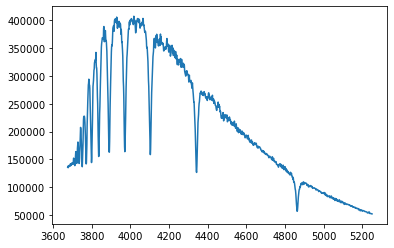

In [5]:
plt.plot(wave1,spec1)

In [6]:
spec2,head2 = fits.getdata(path + 'specDI1526.fits',header=True)
wave2 = np.arange(head2['NAXIS1'])*head2['CDELT1']+head2['CRVAL1']
if head2['DC-FLAG']==1:
    wave2 = 10**wave2

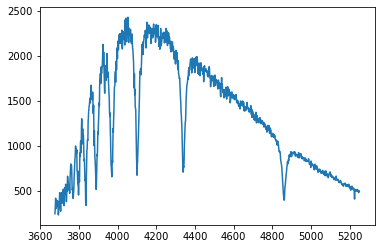

In [7]:
plt.plot(wave2,spec2)

# Continuum normalize

In [8]:
cont1,coef1 = spec.continuum(spec1)

AttributeError: module 'spec' has no attribute 'continuum'

In [ ]:
plt.plot(spec1)
plt.plot(cont1)

In [ ]:
nspec1 = spec1/cont1

In [ ]:
plt.plot(nspec1)

In [ ]:
cont2,coef2 = spec.continuum(spec2)

In [ ]:
nspec2 = spec2/cont2

In [ ]:
plt.plot(nspec2)
plt.ylim(0,1.5)

In [ ]:
wave1-wave2

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(nspec1)
plt.plot(nspec2,'r')
plt.xlim(200,600)
plt.ylim(0,1.2)

In [ ]:
def ccorrelate(x,y,lag):
    """ Cross-Correlation"""
    nx = len(x)
    # Subract mean values
    xd = x-np.mean(x)
    yd = y-np.mean(y)
    nlag = len(lag)
    cross = np.zeros(nlag,dtype=float)
    # Loop over lag points
    for k in range(nlag):
        # Note the reversal of the variables for negative lags.
        if lag[k]>0:
            cross[k] = np.sum(xd[0:nx-lag[k]] * yd[lag[k]:])
        else:
            cross[k] =  np.sum(yd[0:nx+lag[k]] * xd[-lag[k]:])
    cross /= np.sqrt(np.sum(xd**2)*np.sum(yd**2))
    return cross

In [ ]:
lag = np.arange(101)-50
print(lag)

In [ ]:
lag = np.arange(101)-50
cc = ccorrelate(nspec1[200:600],nspec2[200:600],lag)

In [ ]:
plt.plot(lag,cc)

In [ ]:
plt.plot(lag,cc)
plt.scatter(lag,cc)
plt.xlim(-10,10)
plt.ylim(0.6,1)

In [ ]:
lag[np.argmax(cc)]

In [ ]:
pars,cov = spec.gaussfit(lag[40:60],cc[40:60])
gmodel = spec.gaussian(lag,*pars)
print(pars)

In [ ]:
plt.plot(lag,cc)
plt.scatter(lag,cc)
plt.plot(lag,gmodel,'r')
plt.xlim(-10,10)
plt.ylim(0.6,1)

# Synthetic spectra

In [ ]:
wave1

## Color-Temperature Relationship

In [ ]:
coef = [-0.452476, 1.27735, -1.16871, 0.885106, 0.507745]

In [ ]:
# From Simbad, HD7795 has B-V=-0.080
# From Demers & Irwin (1990) DI1526 has B-V=-0.12

In [ ]:
print(5040.0/np.poly1d(coef)(-0.08))
print(5040.0/np.poly1d(coef)(-0.12))

## 6000 K

In [ ]:
sp = fits.getdata('spec.t6000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
plt.plot(w,sp['flux'])

In [ ]:
plt.plot(w,sp['flux']/sp['cont'])

In [ ]:
plt.plot(w,s2)

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## 8000 K

In [ ]:
sp = fits.getdata(path + 'spec.t8000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## 10000 K

In [ ]:
sp = fits.getdata(path + 'spec.t10000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## 12000 K

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## 14000 K

In [ ]:
sp = fits.getdata(path + 'spec.t14000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## [Fe/H] = 0.0

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m+0.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## [Fe/H] = -0.5

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m-0.50.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## [Fe/H] = -1.0

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## [Fe/H] = -1.5

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m-1.50.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

## [Fe/H] = -2.0

In [ ]:
sp = fits.getdata(path + 'spec.t12000g4.00m-2.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

In [ ]:
sp = fits.getdata(path + 'spec.t10000g3.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)

In [ ]:
sp = fits.getdata(path + 'spec.t10000g5.00m-1.00.fits.gz')
w = sp['wave']
s = sp['flux']/sp['cont']
c,ccoef = spec.continuum(s)
s2 = s/c

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(wave1,nspec1)
plt.plot(w,s2,'r')
plt.xlim(3800,5000)
plt.ylim(0,1.2)